# TASK 1

In [1]:
import numpy as np
#from keras.utils import to_categorical
from keras import models
from keras import layers
from keras.datasets import imdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from keras.models import Sequential
df=pd.read_csv("CSV/mushrooms.csv",delimiter=',')

About this file
Attribute Information: (classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [2]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
df.keys()

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [4]:
df=pd.read_csv("CSV/mushrooms.csv",delimiter=',')
df['class'] = df['class'].map({'e':0,'p':1})
df['cap-shape'] = df['cap-shape'].map({'b':1,'c':2,'x':3,'f':4,'k':5,'s':6})
df['cap-surface'] = df['cap-surface'].map({'f':1,'g':2,'y':3,'s':4})
df['cap-color'] = df['cap-color'].map({'n':1,'b':2,'c':3,'g':4,'r':5,'p':6,'u':7,'e':8,'w':9,'y':10})
df['bruises'] = df['bruises'].map({'t':1,'f':2})
df['odor'] = df['odor'].map({'a':1,'l':2,'c':3,'y':4,'f':5,'m':6,'n':7,'p':8,'s':9})
df = df[['class','cap-shape','cap-surface','cap-color','bruises','odor']]
df

,class,cap-shape,cap-surface,cap-color,bruises,odor
0,1,3,4,1,1,8
1,0,3,4,10,1,1
2,0,1,4,9,1,2
3,1,3,3,9,1,8
4,0,3,4,4,2,7
...,...,...,...,...,...,...
8119,0,5,4,1,2,7
8120,0,3,4,1,2,7
8121,0,4,4,1,2,7
8122,1,5,3,1,2,4


In [5]:
n = 8000
X = np.array(df[['cap-shape','cap-surface','cap-color','bruises','odor']][:n])
Y = np.array(df['class'][:n])
print(X[:10],Y[:10])
print(len(X),len(Y))

[[ 3  4  1  1  8]
 [ 3  4 10  1  1]
 [ 1  4  9  1  2]
 [ 3  3  9  1  8]
 [ 3  4  4  2  7]
 [ 3  3 10  1  1]
 [ 1  4  9  1  1]
 [ 1  3  9  1  2]
 [ 3  3  9  1  8]
 [ 1  4 10  1  1]] [1 0 0 1 0 0 0 0 1 0]
8000 8000


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               3000      
                                                                 
 dropout (Dropout)           (None, 500)               0         
                                                                 
 batch_normalization (BatchN  (None, 500)              2000      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 100)               50100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 55,201
Trainable params: 54,201
Non-trainable params: 1,000
________________________________________________

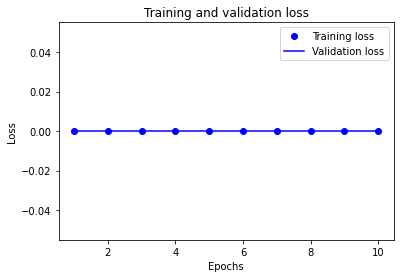

In [6]:

test_x = X[:4000]
test_y = Y[:4000]
train_x = X[4000:]
train_y = Y[4000:]

model =  models.Sequential()
model.add(layers.Dense(500, activation='relu', input_shape=(5,)))
model.add(layers.BatchNormalization()) 
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='categorical_crossentropy',   optimizer='adam', metrics=['accuracy'])
history = model.fit(train_x,
                    train_y,
                    epochs=10,
                    batch_size=64,                                   
                    validation_split=0.2,
                    verbose = 2)

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# model = models.Sequential()
# # Input - Layer
# model.add(layers.Input(shape=(1000,)))
# model.add(layers.Dense(2, activation = "relu", input_shape=(1000, )))
# # Hidden - Layers
# model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
# model.add(layers.Dense(2, activation = "relu"))
# model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
# model.add(layers.Dense(2, activation = "relu"))
# # Output- Layer
# model.add(layers.Dense(1, activation = "sigmoid"))
# model.summary()
# # compiling the model
# model.compile(
#     optimizer = "adam",
#     loss = "binary_crossentropy",
#     metrics = ["accuracy"],
#     run_eagerly=True
# )
# results = model.fit(
#     train_x, train_y,
#     epochs= 10,
#     batch_size = 500,
#     validation_data = (test_x, test_y)
# )
# print(results.history.keys())

# TASK 2

In [7]:
from __future__ import absolute_import, division, print_function, unicode_literals
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import logging
from keras.models import Sequential
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [8]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

In [9]:
zip_dir_base = os.path.dirname(zip_dir)
zip_dir_base

'C:\\Users\\Alex\\.keras\\datasets'

In [10]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [11]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

print('Кошек в тестовом наборе данных: ', num_cats_tr)
print('Собак в тестовом наборе данных: ', num_dogs_tr)

print('Кошек в валидационном наборе данных: ', num_cats_val)
print('Собак в валидационном наборе данных: ', num_dogs_val)
print('--')
print('Всего изображений в тренировочном наборе данных: ', total_train)
print('Всего изображений в валидационном наборе данных: ', total_val)

Кошек в тестовом наборе данных:  1000
Собак в тестовом наборе данных:  1000
Кошек в валидационном наборе данных:  500
Собак в валидационном наборе данных:  500
--
Всего изображений в тренировочном наборе данных:  2000
Всего изображений в валидационном наборе данных:  1000


In [12]:
BATCH_SIZE = 100 # количество тренировочных изображений для обработки перед обновлением параметров модели
IMG_SHAPE = 150 # размерность к которой будет преведено входное изображение

In [13]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 5, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

Found 2000 images belonging to 2 classes.


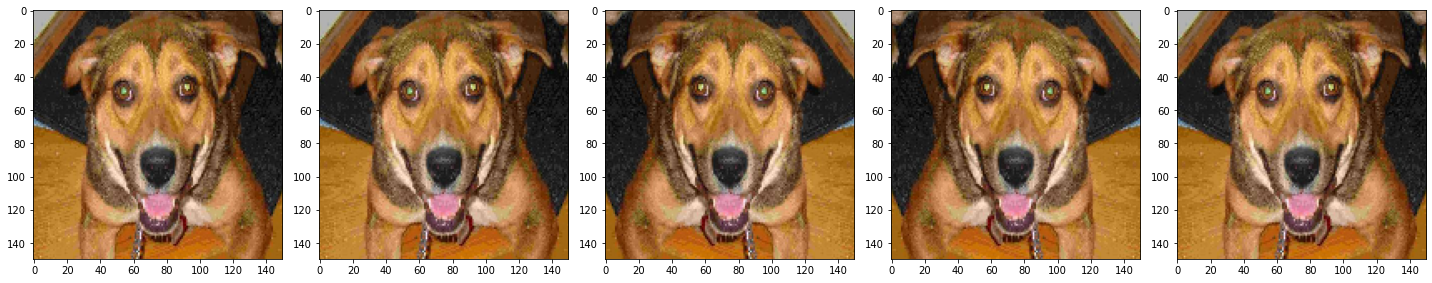

In [14]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Found 2000 images belonging to 2 classes.


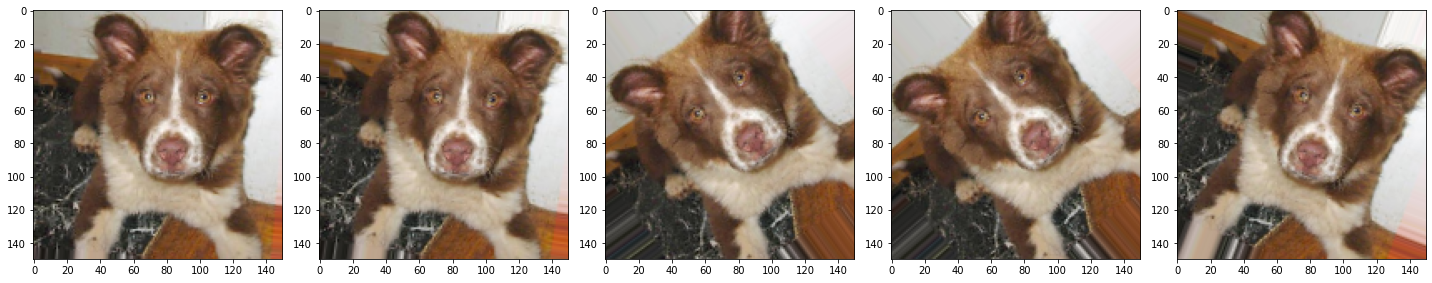

In [15]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Found 2000 images belonging to 2 classes.


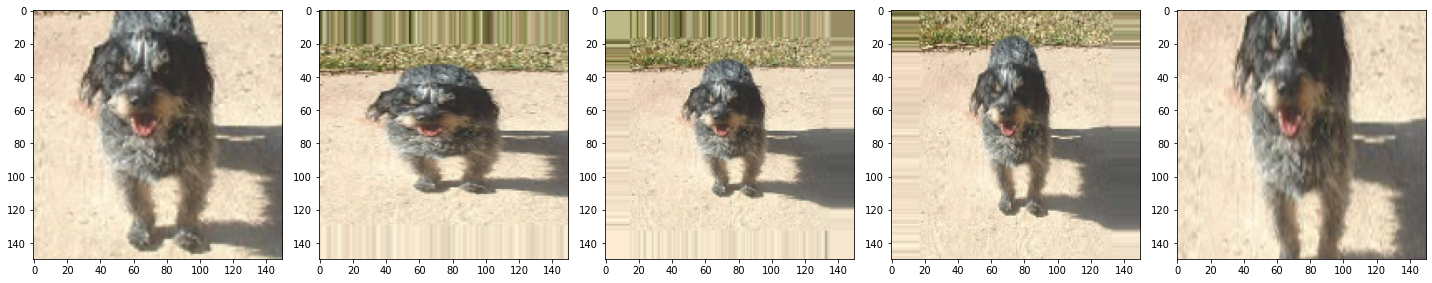

In [16]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [17]:
image_gen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE, IMG_SHAPE),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


In [18]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=validation_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


In [19]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [20]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)     

In [21]:
EPOCHS = 10
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

C:\Users\Alex\AppData\Local\Temp/ipykernel_20680/710565696.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
20/20 [==============================] - 73s 4s/step - loss: 0.7111 - accuracy: 0.4915 - val_loss: 0.6925 - val_accuracy: 0.5400
Epoch 2/10
20/20 [==============================] - 72s 4s/step - loss: 0.6925 - accuracy: 0.5210 - val_loss: 0.6854 - val_accuracy: 0.5240
Epoch 3/10
20/20 [==============================] - 80s 4s/step - loss: 0.6756 - accuracy: 0.5790 - val_loss: 0.6601 - val_accuracy: 0.5990
Epoch 4/10
20/20 [==============================] - 81s 4s/step - loss: 0.6640 - accuracy: 0.5920 - val_loss: 0.6336 - val_accuracy: 0.6470
Epoch 5/10
20/20 [==============================] - 82s 4s/step - loss: 0.6566 - accuracy: 0.6035 - val_loss: 0.6328 - val_accuracy: 0.6300
Epoch 6/10
20/20 [==============================] - 83s 4s/step - loss: 0.6381 - accuracy: 0.6250 - val_loss: 0.6983 - val_accuracy: 0.5630
Epoch 7/10
20/20 [==============================] - 82s 4s/step - loss: 0.6557 - accuracy: 0.5930 - val_loss: 0.6509 - val_accuracy: 0.5570
Epoch 8/10
20/20 [==

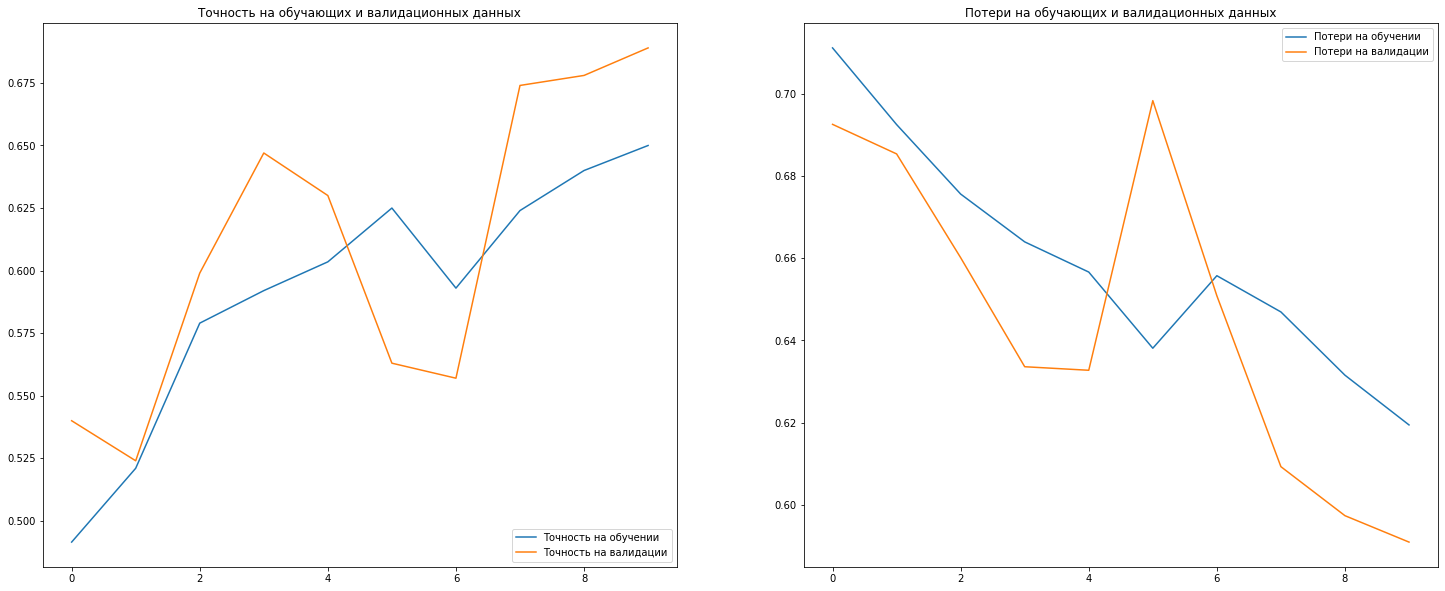

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(25,10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Точность на обучении')
plt.plot(epochs_range, val_acc, label='Точность на валидации')
plt.legend(loc='lower right')
plt.title('Точность на обучающих и валидационных данных')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Потери на обучении')
plt.plot(epochs_range, val_loss, label='Потери на валидации')
plt.legend(loc='upper right')
plt.title('Потери на обучающих и валидационных данных')
plt.savefig('./foo.png')
plt.show()

https://colab.research.google.com/drive/1UAq-715_utvy-AbTJByStiOHr7YS0UWU#scrollTo=ItvgXgqhXNMb

# TASK 3

In [23]:
(training_data, training_targets), (testing_data, testing_targets) = imdb.load_data(num_words=1000)
print(len(training_data),len(training_targets),len(testing_data),len(testing_targets))
data = np.concatenate((training_data, testing_data), axis=0);targets = np.concatenate((training_targets, testing_targets), axis=0)
def vectorize(sequences, dimension = 1000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        if i<1: print('Sequence ',i,' =',sequence);
        results[i, sequence] = 1; 
        if i<1: print('Results ',i,' =',results[i])
    return results

index = imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in index.items()]) 
decoded = " ".join( [reverse_index.get(i - 3, "#") for i in data[0]] )
print(decoded) 




25000 25000 25000 25000
# this film was just brilliant casting # # story direction # really # the part they played and you could just imagine being there robert # is an amazing actor and now the same being director # father came from the same # # as myself so i loved the fact there was a real # with this film the # # throughout the film were great it was just brilliant so much that i # the film as soon as it was released for # and would recommend it to everyone to watch and the # # was amazing really # at the end it was so sad and you know what they say if you # at a film it must have been good and this definitely was also # to the two little # that played the # of # and paul they were just brilliant children are often left out of the # # i think because the stars that play them all # up are such a big # for the whole film but these children are amazing and should be # for what they have done don't you think the whole story was so # because it was true and was # life after all that was

In [24]:
#print(data[0][:30]) 
data = vectorize(data)
#print(data[0][:30]) 

targets = np.array(targets).astype("float32")
test_x = data[:1000]
test_y = targets[:1000]
train_x = data[1000:]
train_y = targets[1000:]
model = models.Sequential()
# Input - Layer
model.add(layers.Dense(50, activation = "relu", input_shape=(1000, )))
# Hidden - Layers
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
# Output- Layer
model.add(layers.Dense(1, activation = "sigmoid"))
model.summary()


Sequence  0  = [1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
Results  0  = [0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 0. 1. 1. 0. 1. 0. 1. 0. 1.

In [25]:
# compiling the model
model.compile(
 optimizer = "adam",
 loss = "binary_crossentropy",
 metrics = ["accuracy"]
)
results = model.fit(
 train_x, train_y,
 epochs= 10,
 batch_size = 500,
 validation_data = (test_x, test_y)
)
print(results.history.keys())

print("Test-Accuracy:", np.mean(results.history["val_accuracy"]))

print("Categories:", np.unique(targets))
print("Number of unique words:", len(np.unique(np.hstack(data))))

length = [len(i) for i in data]
print("Average Review length:", np.mean(length))
print("Standard Deviation:", round(np.std(length)))

Epoch 1/10
98/98 [==============================] - 2s 11ms/step - loss: 0.4827 - accuracy: 0.7618 - val_loss: 0.3164 - val_accuracy: 0.8510
Epoch 2/10
98/98 [==============================] - 1s 9ms/step - loss: 0.3356 - accuracy: 0.8565 - val_loss: 0.3061 - val_accuracy: 0.8580
Epoch 3/10
98/98 [==============================] - 1s 9ms/step - loss: 0.3088 - accuracy: 0.8688 - val_loss: 0.3014 - val_accuracy: 0.8660
Epoch 4/10
98/98 [==============================] - 1s 9ms/step - loss: 0.2941 - accuracy: 0.8764 - val_loss: 0.3045 - val_accuracy: 0.8620
Epoch 5/10
98/98 [==============================] - 1s 9ms/step - loss: 0.2767 - accuracy: 0.8869 - val_loss: 0.3105 - val_accuracy: 0.8610
Epoch 6/10
98/98 [==============================] - 1s 9ms/step - loss: 0.2554 - accuracy: 0.8971 - val_loss: 0.3172 - val_accuracy: 0.8640
Epoch 7/10
98/98 [==============================] - 1s 9ms/step - loss: 0.2378 - accuracy: 0.9058 - val_loss: 0.3282 - val_accuracy: 0.8550
Epoch 8/10
98/98 [=